# Importing python library

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# CSV file import

In [2]:
SILKYSKY_DATA = pd.read_csv("SILKYSKY_DATA_CW2.csv", encoding="latin-1")

# Showing first few rows of the dataset

In [3]:
SILKYSKY_DATA.head(5)

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


# Descriptive Statistics

In [4]:
SILKYSKY_DATA.describe()

,Ref,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,4164.071066,2.522319,3.060248,2.756852,2.976825,3.202023,3.250250,3.398666,3.358071,3.382247,3.350930,3.631708,3.304185,3.640331,3.286245,14.818390,15.181275
std,29994.645522,37463.812252,15.114964,1346.755749,1.447848,1.525143,1.398993,1.277703,1.329625,1.349607,1.365819,1.333104,1.288478,1.315715,1.181056,1.265501,1.175822,1.312373,38.313911,38.774453
min,0.000000,1.000000,7.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,4760.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,4760.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,4760.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,5940.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Dataset information

In [5]:
SILKYSKY_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

# Identification of duplicate values

In [6]:
duplicate_values_skyline = SILKYSKY_DATA[SILKYSKY_DATA.duplicated()]
print("Duplicate values:")
duplicate_values_skyline

Duplicate values:


,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes


# Missing value identification

In [7]:
SILKYSKY_DATA.isnull().sum()

Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness     

# Filling missing values

In [8]:
SILKYSKY_DATA.fillna(method='bfill', inplace=True)

# Data pre-processing

In [9]:
label_encoder_data = {}
category_columns = ['Gender', 'Satisfied', 'Age Band', 'Type of Travel', 'Class', 'Destination', 'Continent']
for col in category_columns:
    label_encoder = LabelEncoder()
    SILKYSKY_DATA[col] = label_encoder.fit_transform(SILKYSKY_DATA[col])
    label_encoder_data[col] = label_encoder

# Deleting unnecessary data

In [10]:
X_data = SILKYSKY_DATA.drop(['Ref', 'id', 'Satisfied', 'Age'], axis=1)

# Target column

In [11]:
y_data = SILKYSKY_DATA['Satisfied']

# Data set split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.35, random_state=42)

# Decision Tree

## Initialize and train Decision Tree

In [13]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Predictions

In [14]:
y_pred_dt = dt_classifier.predict(X_test)

## Metrics

In [15]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
log_loss_dt = log_loss(y_test, dt_classifier.predict_proba(X_test))
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

In [16]:
print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_dt:.2f}")

Decision Tree Classifier
Accuracy: 0.98


In [17]:
print(f"Log Loss: {log_loss_dt:.2f}")

Log Loss: 0.65


In [18]:
print("Confusion Matrix:")
print(conf_matrix_dt)

Confusion Matrix:
[[ 6250   341]
 [  317 29459]]


In [19]:
print("Classification Report:")
print(class_report_dt)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6591
           1       0.99      0.99      0.99     29776

    accuracy                           0.98     36367
   macro avg       0.97      0.97      0.97     36367
weighted avg       0.98      0.98      0.98     36367



## Plot the Decision Tree

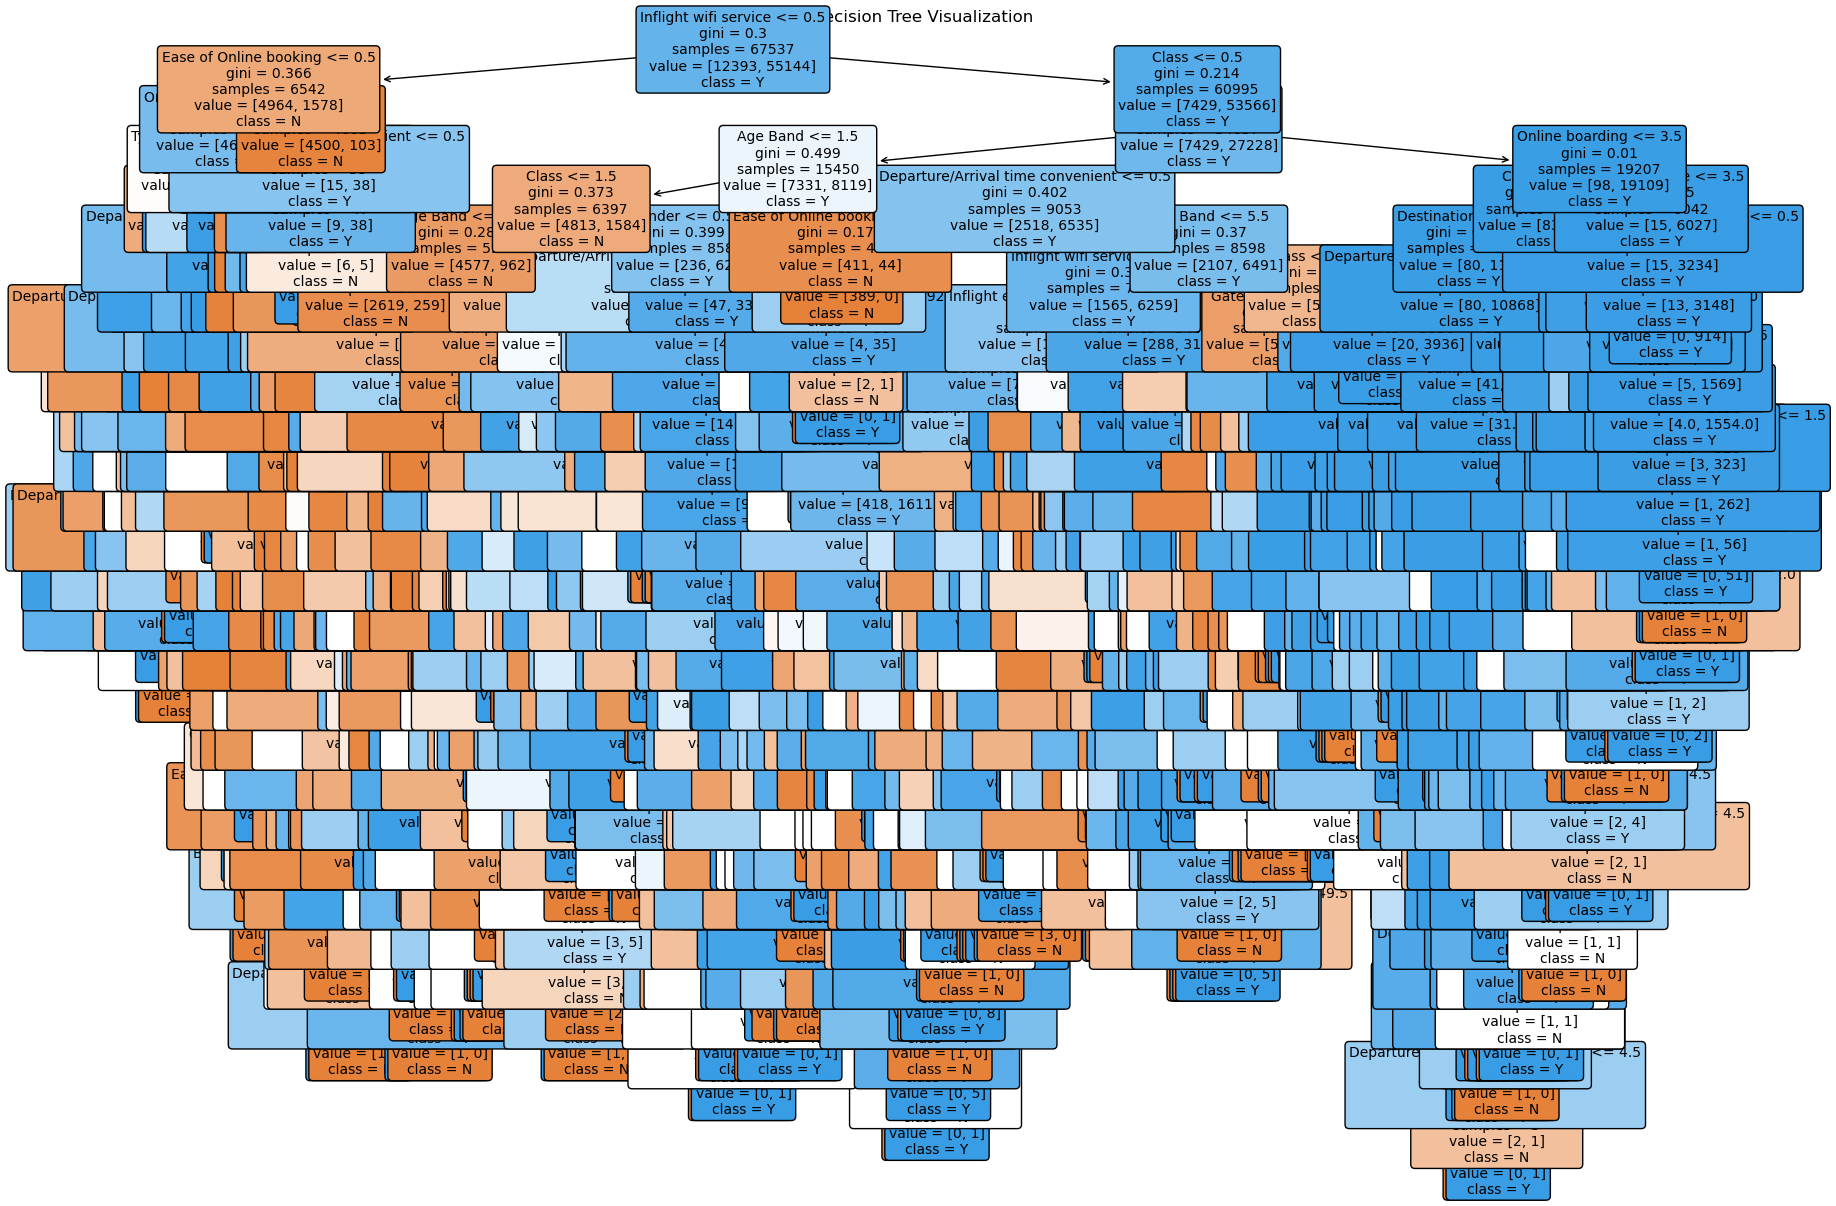

In [20]:
plt.figure(figsize=(20, 15))
plot_tree(dt_classifier, 
          feature_names=X_data.columns, 
          class_names=label_encoder_data['Satisfied'].classes_, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

# Random Forest

## Initialize and train Random Forest

In [21]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predictions

In [22]:
y_pred_rf = rf_classifier.predict(X_test)

## Metrics

In [23]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, rf_classifier.predict_proba(X_test))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [24]:
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_rf:.2f}")

Random Forest Classifier
Accuracy: 0.99


In [25]:
print(f"Log Loss: {log_loss_rf:.2f}")

Log Loss: 0.06


In [26]:
print("Confusion Matrix:")
print(conf_matrix_rf)

Confusion Matrix:
[[ 6351   240]
 [  130 29646]]


In [27]:
print("Classification Report:")
print(class_report_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6591
           1       0.99      1.00      0.99     29776

    accuracy                           0.99     36367
   macro avg       0.99      0.98      0.98     36367
weighted avg       0.99      0.99      0.99     36367



# Visualizations

## Plot histogram of Flight Distance

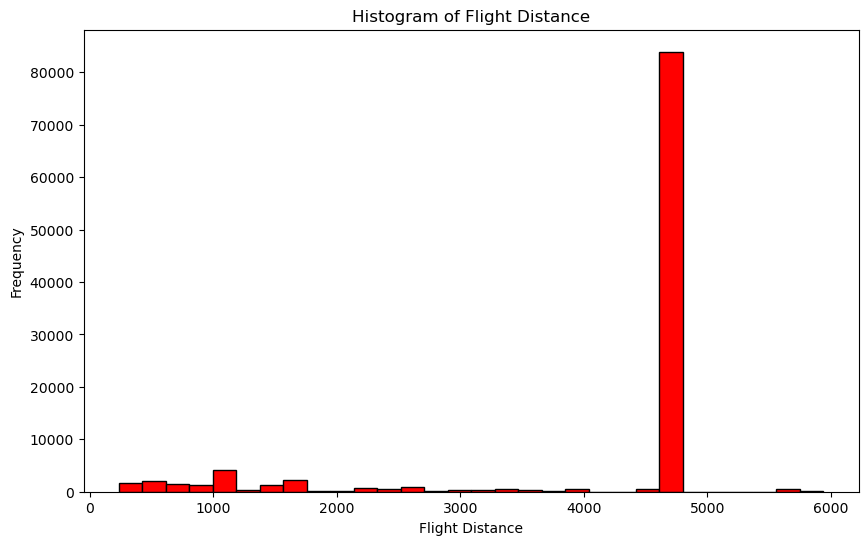

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(SILKYSKY_DATA['Flight Distance'], bins=30, color='Red', edgecolor='black')
plt.title('Histogram of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

## Calculate correlation matrix

In [29]:
corr_matrix = X_data.corr()

## Plot heatmap

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Plot confusion matrix for Decision Tree

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder_data['Satisfied'].classes_,
            yticklabels=label_encoder_data['Satisfied'].classes_)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Plot confusion matrix for Random Forest

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds',
            xticklabels=label_encoder_data['Satisfied'].classes_,
            yticklabels=label_encoder_data['Satisfied'].classes_)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Feature importance from Random Forest

In [ ]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_data.shape[1]), importances[indices], align='center')
plt.xticks(range(X_data.shape[1]), X_data.columns[indices], rotation=90)
plt.xlim([-1, X_data.shape[1]])
plt.show()


# Summary tables

## Summary table for Decision Tree

In [ ]:
summary_dt = pd.DataFrame({
    'Metric': ['Accuracy', 'Log Loss'],
    'Score': [accuracy_dt, log_loss_dt]
})
print("Decision Tree Summary:")
print(summary_dt)

## Summary table for Random Forest

In [ ]:
summary_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Log Loss'],
    'Score': [accuracy_rf, log_loss_rf]
})
print("Random Forest Summary:")
print(summary_rf)